<a href="https://colab.research.google.com/github/Diptesh2006/Image-Classification-Challenge-_-IEEECS/blob/main/IEEECS_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the CSV file:


Saving data.csv to data.csv


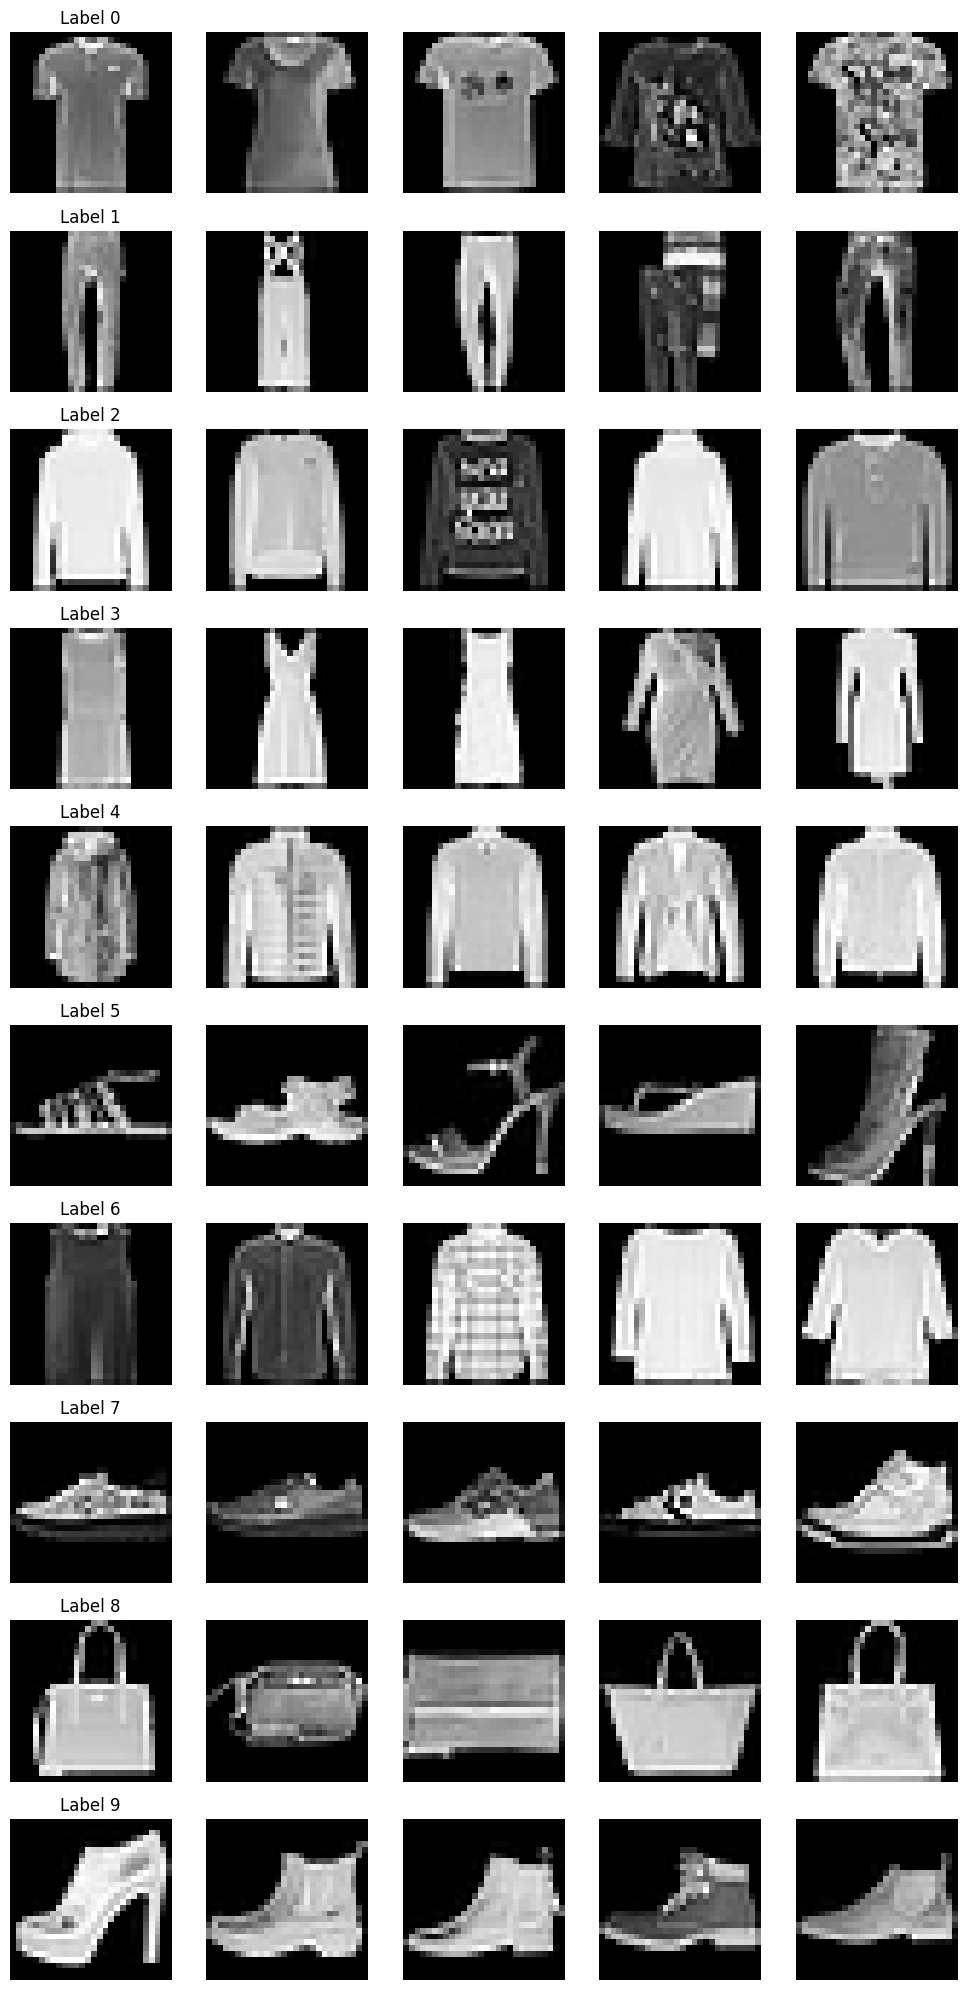

                0             1             2             3             4    \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000004      0.000024      0.000139      0.000400      0.000972   
std        0.000371      0.001063      0.004793      0.009619      0.016889   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.062745      0.141176      0.886275      0.643137      0.890196   

                5             6             7             8             9    \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.001614      0.003160      0.008621      0.022282      0.056819   
std        0.022882      0.032221      0.055275    

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 85.08%
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1232
           1       0.97      0.95      0.96      1174
           2       0.76      0.76      0.76      1200
           3       0.85      0.87      0.86      1242
           4       0.74      0.77      0.76      1185
           5       0.93      0.93      0.93      1141
           6       0.65      0.58      0.61      1243
           7       0.93      0.94      0.93      1224
           8       0.94      0.95      0.95      1149
           9       0.96      0.95      0.96      1210

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



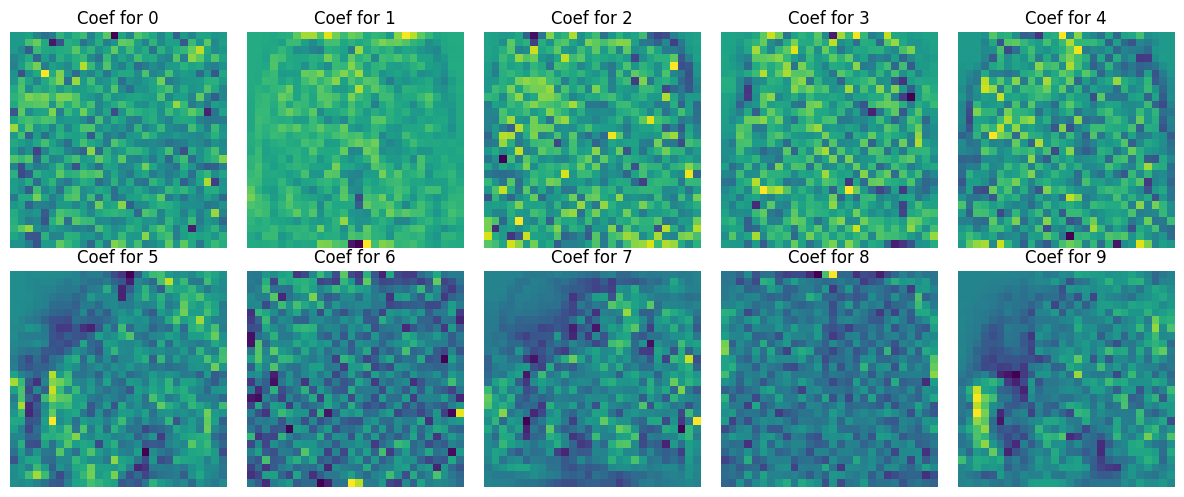

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6504 - loss: 1.0013 - val_accuracy: 0.8448 - val_loss: 0.4505
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8268 - loss: 0.4919 - val_accuracy: 0.8608 - val_loss: 0.3948
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8460 - loss: 0.4289 - val_accuracy: 0.8692 - val_loss: 0.3701
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8503 - loss: 0.4025 - val_accuracy: 0.8752 - val_loss: 0.3542
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8630 - loss: 0.3812 - val_accuracy: 0.8769 - val_loss: 0.3494
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8695 - loss: 0.3648 - val_accuracy: 0.8769 - val_loss: 0.3430
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8739 - loss: 0.3536 - val_accuracy: 0.8725 - val_loss: 0.3565
Epoch 8/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8747 - loss: 0.3415 - val_accuracy: 0

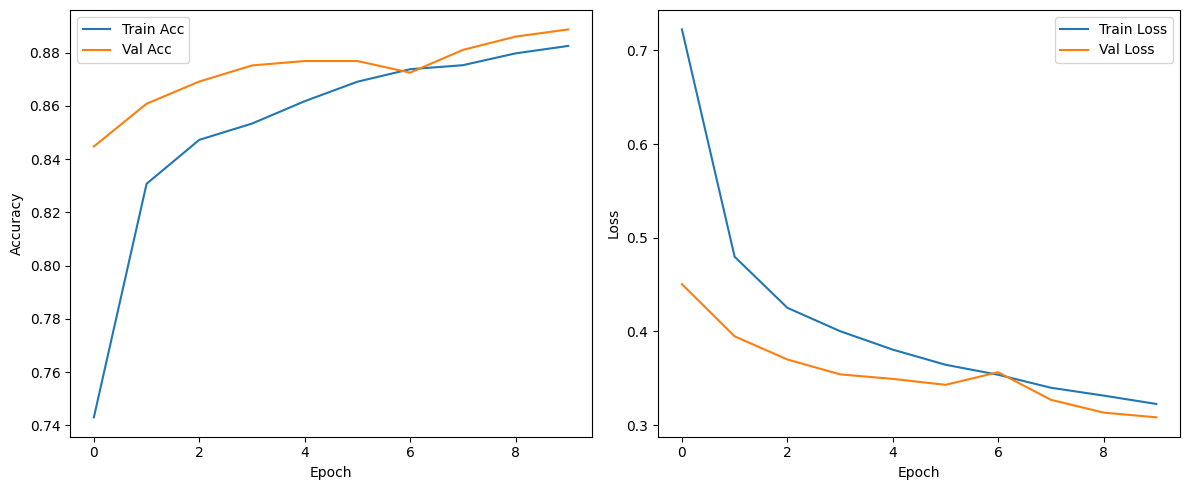

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# Upload the CSV file
print("Please upload the CSV file:")
uploaded = files.upload()
csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[csv_filename]))

# Prepare data: get labels and pixel values (columns: 'pixel1', 'pixel2', ... 'pixel784')
if 'label' not in df.columns:
    raise ValueError("CSV file must have a 'label' column.")
labels = df['label'].values
pixel_cols = [col for col in df.columns if col.startswith('pixel')]
images = df[pixel_cols].values.astype(np.float32) / 255.0
images_reshaped = images.reshape(-1, 28, 28)

# Visualize sample images from each category
num_categories = len(np.unique(labels))
fig, axes = plt.subplots(num_categories, 5, figsize=(10, 2*num_categories))
for cat in range(num_categories):
    idxs = np.where(labels == cat)[0]
    sample_idxs = np.random.choice(idxs, 5, replace=False)
    for j, idx in enumerate(sample_idxs):
        ax = axes[cat, j] if num_categories > 1 else axes[j]
        ax.imshow(images_reshaped[idx], cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_title(f"Label {cat}")
plt.tight_layout()
plt.show()

# Display summary statistics of pixel values
print(pd.DataFrame(images).describe())

# --- Logistic Regression Model ---
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))
coef = log_reg.coef_
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()
for i in range(num_categories):
    axes[i].imshow(coef[i].reshape(28, 28), cmap='viridis')
    axes[i].set_title(f"Coef for {i}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# --- Neural Network Model ---
num_classes = num_categories
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(-1, 28, 28), y_train_cat, validation_split=0.1, epochs=10, batch_size=128)
loss, acc = model.evaluate(X_test.reshape(-1, 28, 28), y_test_cat, verbose=0)
print("Neural Network Test Accuracy: {:.2f}%".format(acc * 100))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Note: The dataset also includes ubyte files. To use those, install 'idx2numpy' and convert them:
#   import idx2numpy
#   images_ubyte = idx2numpy.convert_from_file('path-to-images-ubyte')
#   labels_ubyte = idx2numpy.convert_from_file('path-to-labels-ubyte')
